# Vehicle Insurance Fraud Detection

### Nandhini & Niteesh Kumar
### Madras School of Economics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing data
data = pd.read_csv('Downloads/data set/insurance_claims.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
# There are some missing values denoted by '?', replacing missing values with np.nan

data.replace('?', np.nan, inplace = True)

In [4]:
# creating a new feature 'elapsed time' from existing features

data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

year_diff = data['incident_date'].dt.year - data['policy_bind_date'].dt.year
month_diff = data['incident_date'].dt.month - data['policy_bind_date'].dt.month

# Total difference in months
data['elapsed_time'] = year_diff * 12 + month_diff

In [5]:
# droping columns that aren't necessary for prediction

data.drop(['age','policy_number','policy_bind_date','policy_state','insured_hobbies','insured_zip',
           'incident_date','incident_state','incident_location','insured_hobbies',
           'auto_make','auto_model','auto_year','policy_csl'],axis =1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_deductable            1000 non-null   int64  
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   insured_sex                  1000 non-null   object 
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   object 
 11  collision_type               822 non-null    object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [7]:
# missing values
data.isna().sum()

months_as_customer               0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
elapsed_time                     0
dtype: int64

In [8]:
# Filling missing values with 'Data Unavailable' to prevent data loss and to maintain data integrity

data= data.fillna('Data Unavailable')

<AxesSubplot: >

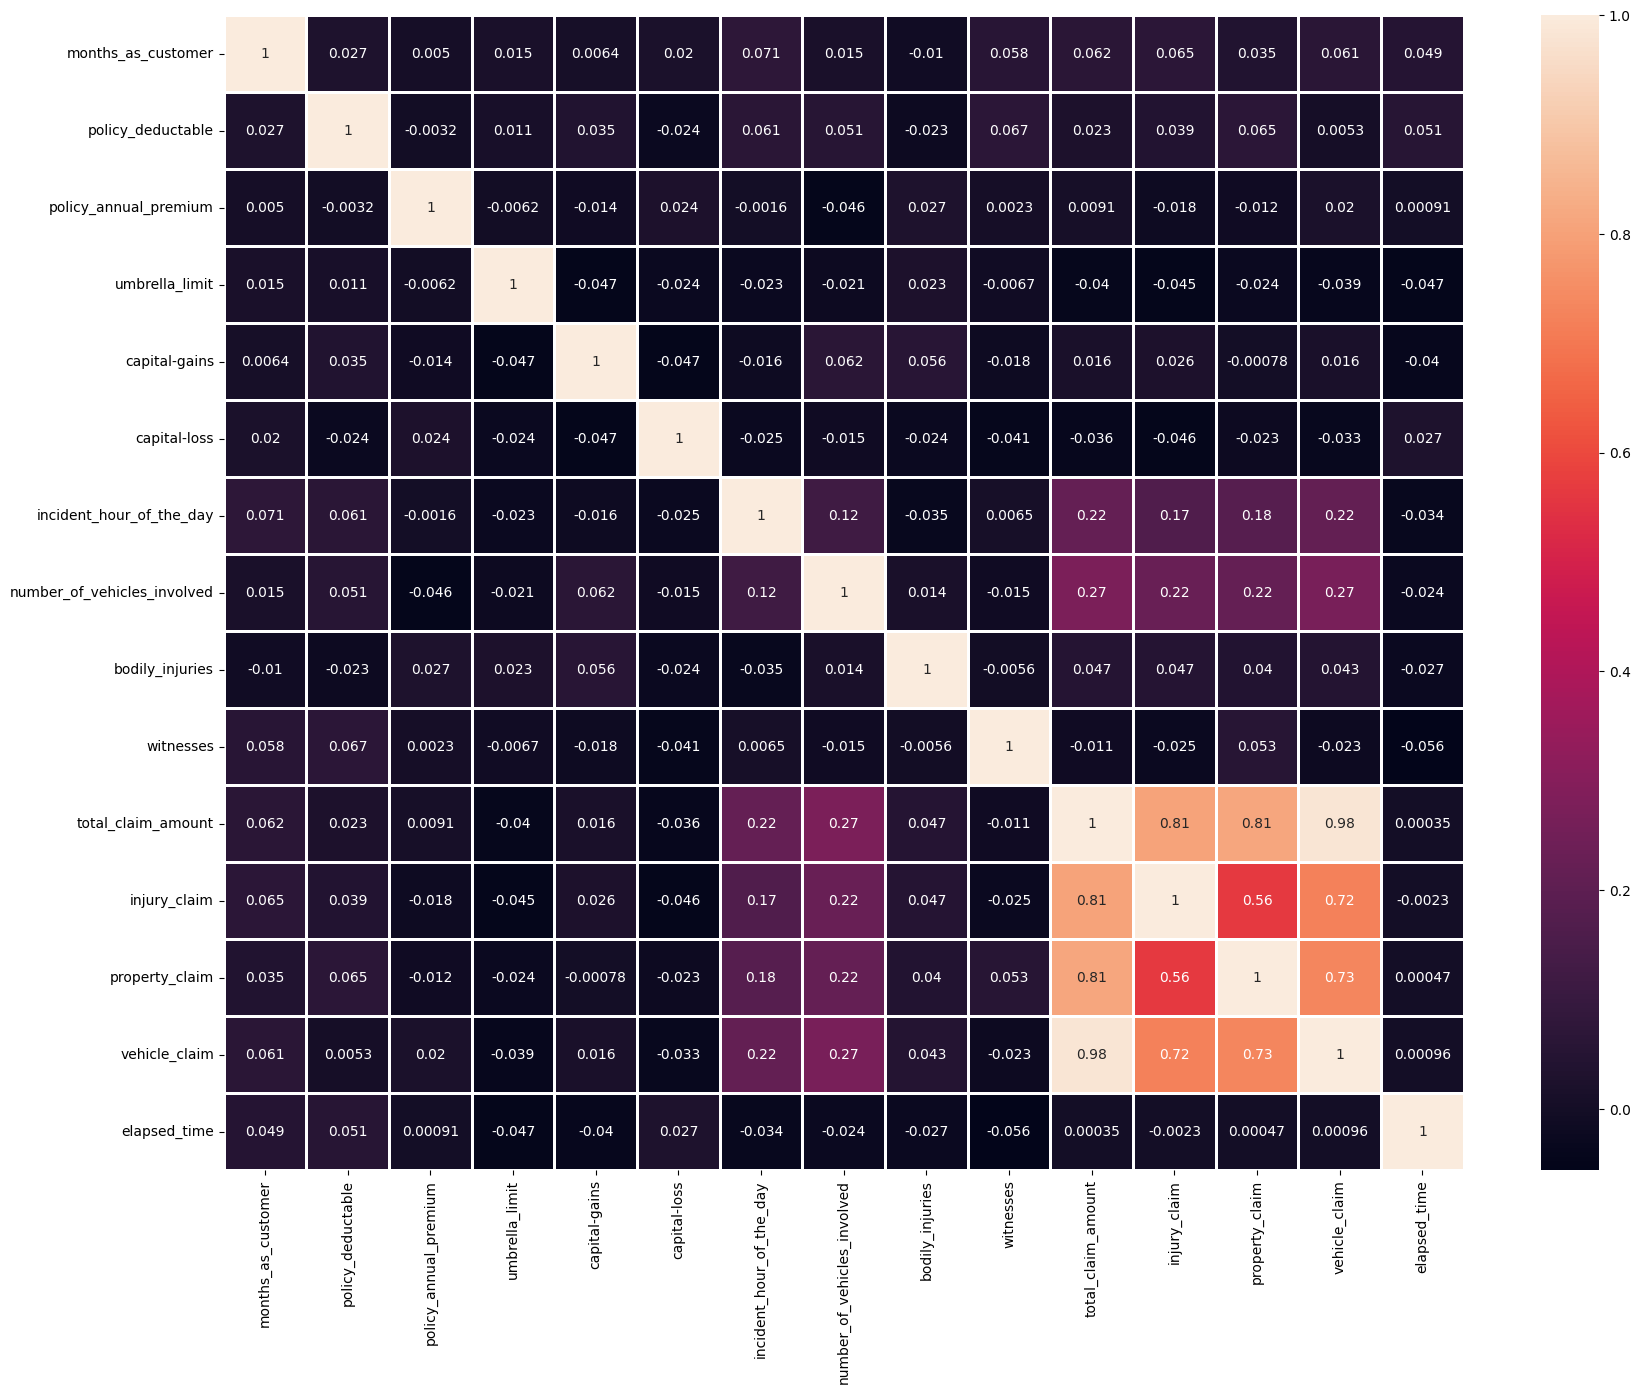

In [9]:
# checking correlation of the dataset
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,linewidths=1)

In [10]:
# The data has multicollnearity, thus we remove total claim amount which is summation of injury, property and vehicle claim 

data.drop('total_claim_amount',axis =1,inplace =True)

In [11]:
data.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,elapsed_time
0,328,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,...,1,YES,1,2,YES,6510,13020,52080,Y,3
1,228,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,...,1,Data Unavailable,0,0,Data Unavailable,780,780,3510,Y,103
2,134,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,...,3,NO,2,3,NO,7700,3850,23100,N,176
3,256,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,Data Unavailable,1,2,NO,6340,6340,50720,Y,305
4,228,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,...,1,NO,0,1,NO,1300,650,4550,N,8


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_deductable            1000 non-null   int64  
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   insured_sex                  1000 non-null   object 
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   object 
 11  collision_type               1000 non-null   object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [13]:
# features and target variable separation

x = data.drop('fraud_reported',axis=1)
y = data['fraud_reported']

In [14]:
# Looking for number of unique values in each column
data.nunique()

months_as_customer             391
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
injury_claim                   638
property_claim                 626
vehicle_claim                  726
fraud_reported                   2
elapsed_time                   296
dtype: int64

In [15]:
# separating categorical data
cat_data = x.select_dtypes(include='object')
cat_data

,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,property_damage,police_report_available
0,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,YES,YES
1,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Data Unavailable,Minor Damage,Police,Riverwood,Data Unavailable,Data Unavailable
2,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,NO,NO
3,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,Data Unavailable,NO
4,MALE,Associate,sales,unmarried,Vehicle Theft,Data Unavailable,Minor Damage,None,Arlington,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
995,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,Northbrook,YES,Data Unavailable
996,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,Northbend,YES,Data Unavailable
997,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,Arlington,Data Unavailable,YES
998,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,Arlington,Data Unavailable,YES


In [16]:
# One Hot Encoding
dummies = pd.get_dummies(cat_data, drop_first=True)
dummies

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
996,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
997,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# separating numerical data
num_data = x.select_dtypes(include = 'int64')

In [18]:
# creating dataframe including the numerical and dummies
x = pd.concat([num_data,dummies],axis =1)

In [19]:
x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,1,0,0,0,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,1,0,0,0,0,0,1,0,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,0,1,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,...,0,0,0,1,0,0,0,1,0,0
996,285,1000,0,70900,0,23,1,2,3,18080,...,0,0,1,0,0,0,0,1,0,0
997,130,500,3000000,35100,0,4,3,2,3,7500,...,0,0,0,0,0,0,0,0,0,1
998,458,2000,5000000,0,0,2,1,0,1,5220,...,0,0,0,0,0,0,0,0,0,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Now to perform model the numerical data has to be scaled

scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_data)

In [22]:
# creating a dataframe using the scaled data to fit it again to the x series

x_scaled = pd.DataFrame(x_scaled, columns=num_data.columns, index=data.index)

In [23]:
# fitting the scaled data and dummies

x = pd.concat([x_scaled,dummies],axis=1)
x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,...,1,0,0,0,0,0,0,1,0,1
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,...,0,0,0,0,1,0,0,0,0,0
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,...,1,0,0,0,0,0,1,0,1,0
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,...,0,0,0,0,0,0,0,0,1,0
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,2.051155,...,0,0,0,1,0,0,0,1,0,0
996,0.704407,-0.222383,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.182342,...,0,0,1,0,0,0,0,1,0,0
997,-0.642767,-1.039966,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.013648,...,0,0,0,0,0,0,0,0,0,1
998,2.208028,1.412784,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.453708,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# encoding the target

y = pd.get_dummies(y,drop_first=True)
y

,Y
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [25]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=65)

In [26]:
len(x_train),len(x_test),len(y_train),len(y_test)

(750, 250, 750, 250)

# Models

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score,classification_report

log_train_score = accuracy_score(y_train,log.predict(x_train))
log_test_score = accuracy_score(y_test,log.predict(x_test))

In [29]:
# Train model accuracy
log_train_score

0.8146666666666667

In [30]:
#test model accuracy
log_test_score

0.848

In [31]:
# Classification Report
print(classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       199
           1       0.66      0.53      0.59        51

    accuracy                           0.85       250
   macro avg       0.77      0.73      0.75       250
weighted avg       0.84      0.85      0.84       250



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
# Train score
tree_train_score = accuracy_score(y_train,tree.predict(x_train))
tree_train_score

1.0

In [34]:
# test score
tree_test_score = accuracy_score(y_test,tree.predict(x_test))
tree_test_score

0.748

In [35]:
# Classification Report
print(classification_report(y_test,tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       199
           1       0.39      0.43      0.41        51

    accuracy                           0.75       250
   macro avg       0.62      0.63      0.63       250
weighted avg       0.76      0.75      0.75       250



# RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
# Train score
rf_train_score = accuracy_score(y_train,rf.predict(x_train))
rf_train_score

1.0

In [38]:
# test score
rf_test_score = accuracy_score(y_test,rf.predict(x_test))
rf_test_score

0.796

In [39]:
# Classification Report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       199
           1       0.50      0.10      0.16        51

    accuracy                           0.80       250
   macro avg       0.65      0.54      0.52       250
weighted avg       0.75      0.80      0.74       250



# K Nearest Neighbour

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
# Train score
knn_train_score = accuracy_score(y_train,knn.predict(x_train))
knn_train_score

0.7786666666666666

In [42]:
# test score
knn_test_score = accuracy_score(y_test,knn.predict(x_test))
knn_test_score

0.728

In [43]:
# Classification Report
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       199
           1       0.19      0.10      0.13        51

    accuracy                           0.73       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.67      0.73      0.69       250



# SVC

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [46]:
# Train score
svc_train_score = accuracy_score(y_train,svc.predict(x_train))
svc_train_score

0.828

In [47]:
# test score
svc_test_score = accuracy_score(y_test,svc.predict(x_test))
svc_test_score

0.796

In [48]:
# Classification Report
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       199
           1       0.00      0.00      0.00        51

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.80      0.71       250



In [49]:
x_test

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
662,0.061240,1.412784,1.262489,0.612885,-0.249423,1.490523,1.140056,0.009759,-1.338700,-0.306122,...,0,0,1,0,0,0,0,1,0,0
414,0.052549,-0.222383,-0.479476,-0.901927,0.953851,-1.100189,-0.823865,0.009759,0.461838,-1.363822,...,0,0,0,0,1,0,0,1,0,0
707,-0.451556,-0.222383,-0.479476,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,0.461838,0.015697,...,0,0,0,0,0,0,0,1,0,0
280,0.478430,-0.222383,-0.479476,-0.901927,-2.032973,0.051239,1.140056,0.009759,1.362107,0.066943,...,1,0,0,0,0,0,1,0,0,0
609,2.251485,-1.039966,-0.479476,-0.901927,0.953851,0.339095,-0.823865,1.229693,-1.338700,-0.170835,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,-0.303801,-1.039966,-0.479476,-0.901927,-1.096698,-1.675903,-0.823865,-1.210174,-1.338700,0.062843,...,0,0,0,0,0,0,0,0,0,1
104,1.269351,-1.039966,-0.479476,0.910822,0.953851,0.483024,1.140056,-1.210174,-1.338700,1.669891,...,0,0,1,0,0,0,1,0,0,0
490,-0.112589,1.412784,-0.479476,0.713394,-0.128384,-1.244118,-0.823865,0.009759,-0.438431,-1.472462,...,0,0,0,0,0,0,0,1,1,0
402,-0.390715,1.412784,-0.479476,1.582077,-0.359782,1.634452,1.140056,1.229693,-1.338700,0.148935,...,1,0,0,0,0,0,0,1,1,0


# Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [51]:
tf_model=Sequential()
tf_model.add(Dense(units=32,activation='relu',input_shape=(61,)))
tf_model.add(Dense(units=62,activation='relu'))
tf_model.add(Dense(units=1,activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

In [52]:
tf_model.fit(x_train,y_train,batch_size=None,verbose=1)

24/24 [==============================] - 1s 4ms/step - loss: 0.7945 - accuracy: 0.3453


In [53]:
y_predict = tf_model.predict(x_test)

8/8 [==============================] - 0s 3ms/step


In [54]:
y_predict=[0 if val<0.5 else 1 for val in y_predict]

In [56]:
# binarising y_train to test accuracy score
y_train_predict = np.where(tf_model.predict(x_train) > 0.5,1,0)
y_train_predict

24/24 [==============================] - 0s 3ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [57]:
# Train score
tf_train_score = accuracy_score(y_train,y_train_predict)
tf_train_score

0.4693333333333333

In [58]:
# test  score
tf_test_score = accuracy_score(y_test,y_predict)
tf_test_score

0.42

# comparing models

In [59]:
models = pd.DataFrame({
    'model': ['log','tree','rf','knn','svc','tf_model'],
    'train_score': [log_train_score,tree_train_score,rf_train_score,knn_train_score,svc_train_score,tf_train_score],
    'test_score': [log_test_score,tree_test_score,rf_test_score,knn_test_score,svc_test_score,tf_test_score]
})

In [60]:
models

,model,train_score,test_score
0,log,0.814667,0.848
1,tree,1.000000,0.748
2,rf,1.000000,0.796
3,knn,0.778667,0.728
4,svc,0.828000,0.796
5,tf_model,0.469333,0.420


In [61]:
models.sort_values('test_score',ascending=False)

,model,train_score,test_score
0,log,0.814667,0.848
2,rf,1.000000,0.796
4,svc,0.828000,0.796
1,tree,1.000000,0.748
3,knn,0.778667,0.728
5,tf_model,0.469333,0.420


In [62]:
# Logistic regression predicts the well !

In [63]:
predictions = log.predict(x_test)  

count_yes = np.count_nonzero(predictions == 1)
count_no = np.count_nonzero(predictions == 0)

print("Count of yes:", count_yes)
print("Count of no:", count_no)

Count of yes: 41
Count of no: 209


In [64]:
log.intercept_

array([-0.26471343])

In [65]:
log.coef_

array([[-0.04861714,  0.13807974,  0.17658738, -0.01275374, -0.11943715,
        -0.07403443,  0.20083028,  0.07624949,  0.11443606, -0.17786752,
         0.00309377,  0.32134063, -0.06856224, -0.04348478,  0.45410915,
         0.10024627,  0.5655114 ,  0.28889685,  0.13733462,  0.25991278,
         0.06157047,  0.38211798,  0.46896869,  0.17253958, -0.54034912,
         0.1558113 , -0.43968547,  0.03841622, -0.65843197, -0.29008461,
         0.29377394,  0.18882194,  0.26379023,  0.70473956,  0.85613891,
         0.23615537,  0.51531539,  0.5564827 ,  0.31767723,  0.5037416 ,
         0.18730361, -0.21516097,  0.08210466, -0.37560058, -2.3081467 ,
        -2.18224777, -1.97427056, -0.34094994, -0.15312725, -0.03524628,
        -0.05161074,  0.02408932, -0.26452791, -0.17830821, -0.35992295,
        -0.13108555, -0.35975926, -0.3532498 , -0.07099431,  0.15168429,
         0.12387398]])

In [66]:
# saving the log model to a joblib file

import joblib

joblib.dump(log,'insurance_fraud_detection_joblib')

['insurance_fraud_detection_joblib']